<style>
.box {
  text-align: center;
  background-color: #FFECEC;
  color: white;
  padding: 20px;
  font-size: 28px;
  font-weight: bold;
  border-radius: 20px;
  max-width: 350px;
  margin: 0 auto;
}
</style>

<div align="center">
  <img src="https://1stwebdesigner.com/wp-content/uploads/2015/10/airbnb-282x105.png" alt="Airbnb Logo" width="900" height="150">
  <br><br>
  <div class="box" style="background-color: #FF8C8C;">
    <h1>Project - Airbnb Exploratory Data Analysis</h1>
  </div>
  <br>
  <h2 style="text-align: center;">Contribution - Team</h2>
  <br>
  <h3 style="text-align: center;">Team Member 1 - Fasil Hameed</h3>
  <h3 style="text-align: center;">Team Member 2 - Pranita karmakar</h3>
  <br>
  <h3 style="text-align: center;">GitHub Links:</h3>
  <p style="text-align: center;"><a href="https://github.com/FasilHameed" target="_blank">https://github.com/FasilHameed</a></p>
  <p style="text-align: center;"><a href="https://github.com/Pranita-karmakar" target="_blank">https://github.com/Pranita-karmakar</a></p>
</div>


<hr>
<hr>

# **Project Summary -**

### The analysis of the Airbnb dataset has revealed valuable insights into various aspects of the listings in New York City. The majority of listings are in the "Entire home/apt" and "Private room" categories, indicating a preference for privacy and independence. Manhattan and Brooklyn are the most popular neighbourhoods, with higher prices and longer minimum stay requirements compared to other areas. The analysis has also highlighted the importance of pricing and availability, with variations based on room types and neighbourhoods. Geographical analysis has identified specific regions with higher prices and longer minimum stay requirements, providing guidance for selecting suitable accommodations.

### Based on these insights, several solutions have been proposed to address business problems. These include refining pricing strategies, promoting underrepresented neighbourhoods, enhancing search filters and user interfaces, and improving guest experiences. The findings also emphasize the significance of data-driven decision making and collaborations with local authorities to optimize operations and comply with regulations. By leveraging these insights, Airbnb can enhance the user experience, attract more hosts and guests, and improve overall business performance in the competitive short-term rental market in New York City.

<hr>
<hr>

# Problem Statement:
Performing exploratory data analysis (EDA) on the Airbnb dataset poses several challenges due to its vast size, comprising millions of listings. Effective strategies are required to process and analyze this extensive dataset to extract valuable insights and patterns. The goal is to uncover trends, patterns, and key features of the data to enhance decision-making and improve the overall Airbnb experience for users and hosts.

# Objective:
The objective of this project is to extract valuable insights and patterns from the Airbnb dataset through data analysis techniques. By examining factors such as pricing trends, geographical distribution, popular amenities, and more, we aim to gain a deeper understanding of various aspects related to Airbnb listings. This analysis will facilitate informed business decisions, enhance user experiences, and improve the overall performance of Airbnb as a service.

<hr>
<hr>

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno
import matplotlib.pyplot as plt
import folium
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# Load Dataset
import pandas as pd
BnB_Data = pd.read_csv("./Airbnb NYC 2019.csv")

### Dataset First Look

In [50]:
# Dataset First Look
BnB_Data.head(3).style.background_gradient(cmap='Oranges')

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_listings_group
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.647490,-73.972370,Private room,149,1,9,2018-10-19 00:00:00,0.210000,6,365,"(5.0, 10.0]"
1,Skylit Midtown Castle,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.380000,2,355,"(0.0, 5.0]"
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.809020,-73.941900,Private room,150,3,0,2019-05-19 00:00:00,0.720000,1,365,"(0.0, 5.0]"


In [7]:
#This is the tail of the the Airbnb dataset
BnB_Data.tail(2).style.background_gradient(cmap='Oranges')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.757510,-73.991120,Shared room,55,1,0,nan,nan,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.764040,-73.989330,Private room,90,7,0,nan,nan,1,23


### Dataset Rows & Columns count

In [8]:
# Shape of Dataset
print('The shape of the Dataset is')
print(BnB_Data.shape)


The shape of the Dataset is
(48895, 16)


In [9]:
# count of data
BnB_Data.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

### Dataset Information

In [10]:
# Dataset Info
BnB_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [51]:
# Dataset Duplicate Value Count
print('The sum of duplicate values in the Dataset is')
BnB_Data.duplicated().sum()

The sum of duplicate values in the Dataset is


0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
(BnB_Data.isnull().sum()/len(BnB_Data)*100).sort_values(ascending = False)

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

### Visualizing the missing values

The below chart shows missing values in the data set columnwise


<AxesSubplot:>

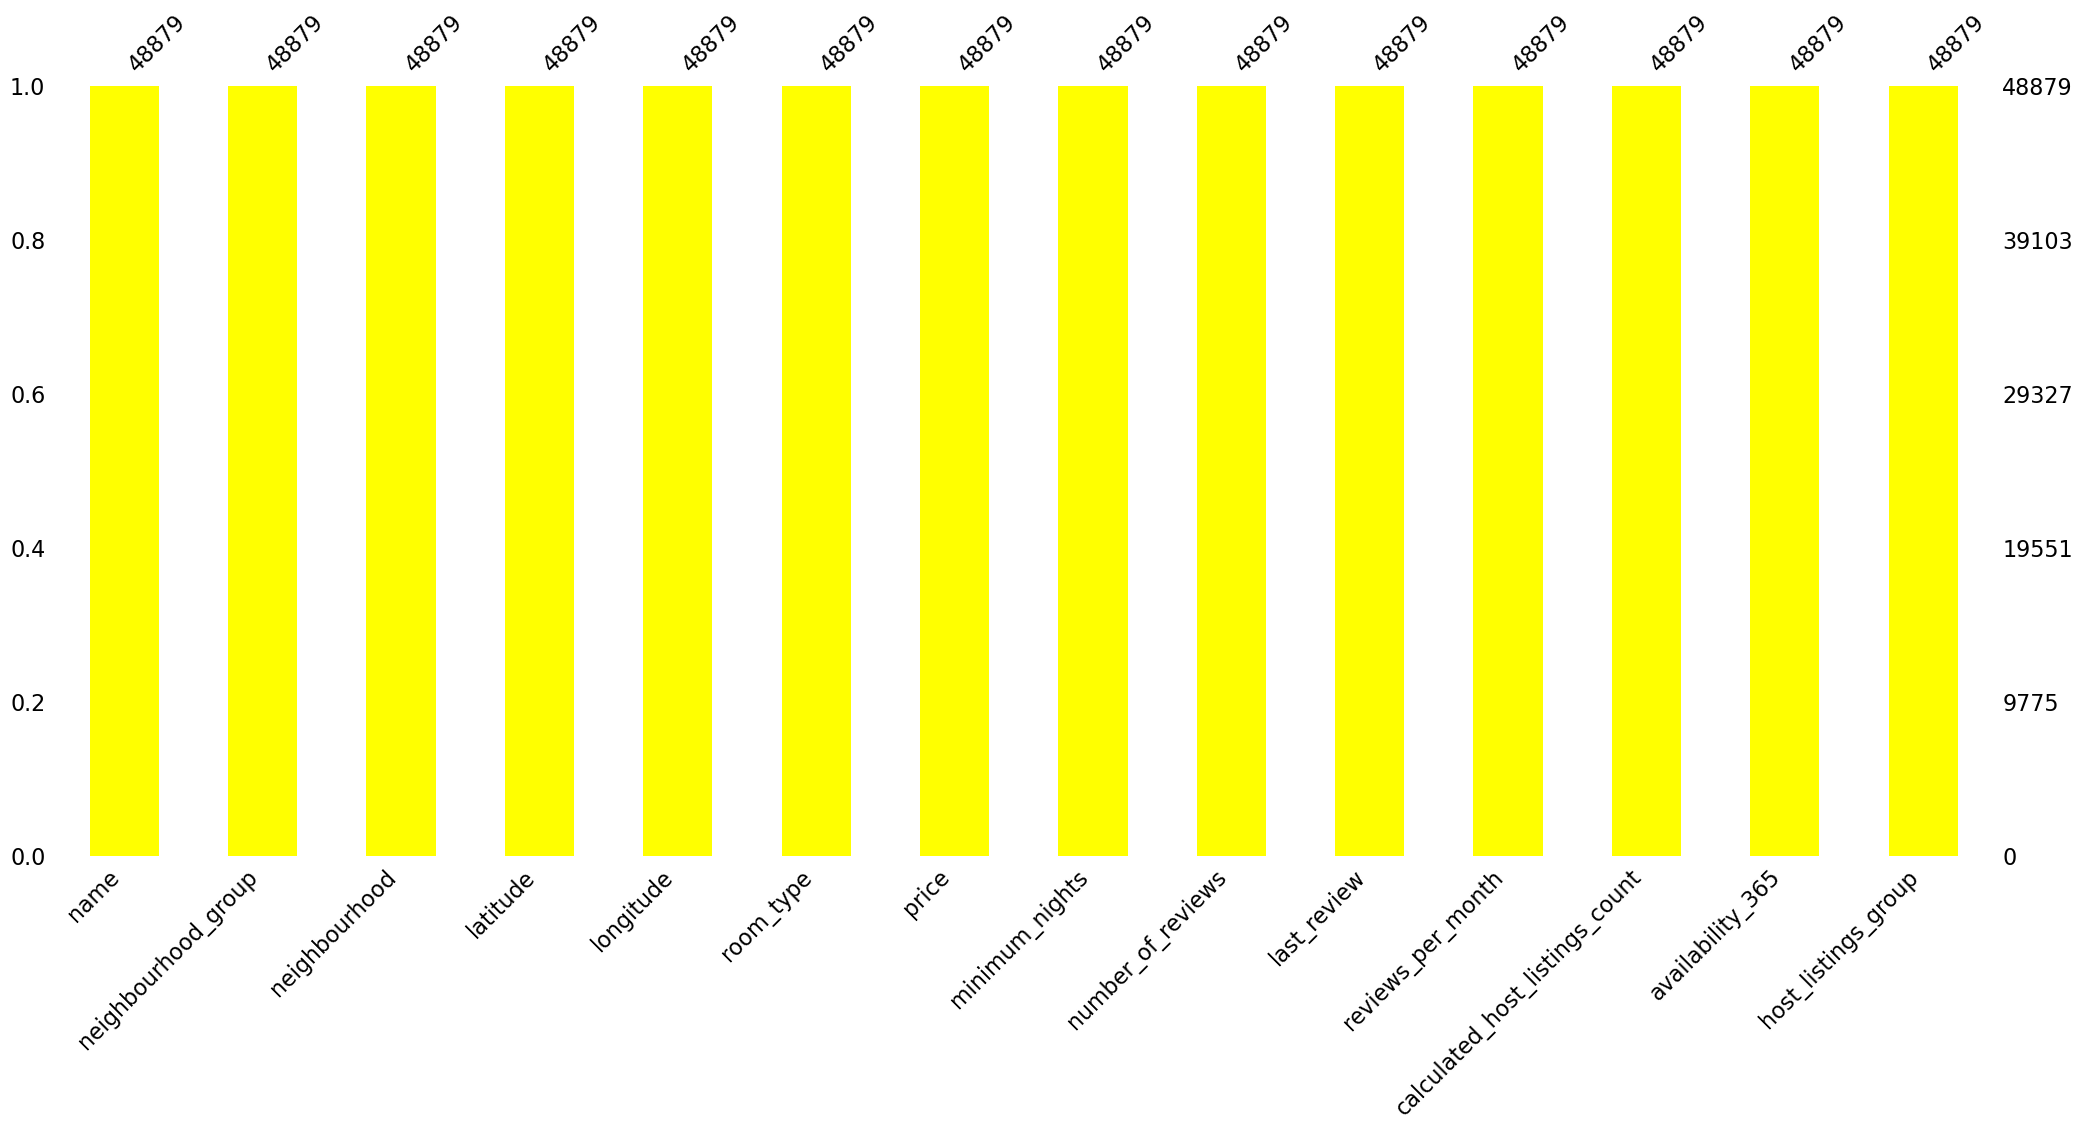

In [52]:
# Visualizing the missing values
print('The below chart shows missing values in the data set columnwise')
msno.bar(BnB_Data,color='Yellow')

# Overview of Dataset

- Duplicate Values: The dataset does not contain any duplicate values. This implies that each row in the dataset represents a unique record.

- Missing Data: Some columns have missing values. The columns "name," "host_name," "last_review," and "reviews_per_month" have missing values, as indicated by the count of non-null values being less than the total number of rows. These missing values may need to be handled appropriately depending on the specific analysis or use case.

- Data Types: The dataset contains a mix of data types. It includes integer, float, and object (string) data types. The data types provide information about the nature of the variables and can help determine appropriate statistical or analytical techniques for further analysis.       

<hr>
<hr>

## ***2. Understanding The Variables of the Dataset***

In [14]:
# Dataset Columns
print('The columns present in our Dataset')

BnB_Data.columns

The columns present in our Dataset


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 5 point summary

In [15]:
# Dataset Describe
print('The description of our Dataset')
BnB_Data.describe().style.background_gradient(cmap='Oranges')

The description of our Dataset


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,19017143.236180,67620010.646610,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,10983108.385610,78610967.032667,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2539.000000,2438.000000,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9471945.000000,7822033.000000,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,19677284.000000,30793816.000000,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,29152178.500000,107434423.000000,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,36487245.000000,274321313.000000,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Observations:

- The dataset contains 48,895 Airbnb listings.
- The average price of the listings is $152.72, with a minimum price of $0 and a maximum price of $10,000. The prices vary widely, as indicated by the - standard deviation of $240.15.
- The average minimum nights required for a stay is approximately 7, with a minimum of 1 night and a maximum of 1,250 nights. The standard deviation of 20.51 suggests some variation in the minimum stay durations.
- The average number of reviews per month is 23.27, with a minimum of 0 and a maximum of 629. This indicates that some listings receive a significant number of reviews, while others have few or no reviews.
- The calculated host listings count ranges from 1 to 327, with an average of 7.14. This suggests that hosts manage multiple listings on average, but there is variation in the number of listings they handle.
- The average availability throughout the year is 112.78 days, with a minimum of 0 days and a maximum of 365 days. This indicates that some listings are available throughout the year, while others have limited availability.
- These observations provide insights into the price range, minimum stay requirements, review activity, host listing count, and availability of the Airbnb listings in the dataset. Further analysis and visualization can uncover more patterns and trends in the data.

### Variables Description

- id: listing ID (int64)

- name: name of the listing (object)

- host_id: host ID (int64)

- host_name: name of the host (object)

- neighbourhood_group: location (object)

- neighbourhood: area (object)

- latitude: latitude coordinates (float64)

- longitude: longitude coordinates (float64)

- room_type: listing space type (object)

- price: price in dollars (int64)

- minimum_nights: amount of nights minimum (int64)

- number_of_reviews: number of reviews (int64)


- last_review: latest review (object)

- reviews_per_month: number of reviews per month (float64)

- calculated_host_listings_count: amount of listings per host (int64)

- availability_365: number of days when listing is available (int64)

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
def unique_values(x):
  return BnB_Data[x].unique()
for i in BnB_Data:
  if i == 'neighbourhood' or i == 'reviews_per_month' or i=='price':
    continue
  else:
    print("-"*50)
    print(" "*50)
    print('Unique values of',i)
    print(unique_values(i))
    print("-"*50)
    print(" "*50)


--------------------------------------------------
                                                  
Unique values of id
[    2539     2595     3647 ... 36485431 36485609 36487245]
--------------------------------------------------
                                                  
--------------------------------------------------
                                                  
Unique values of name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
--------------------------------------------------
                                                  
--------------------------------------------------
                                                  
Unique values of host_id
[     2787      2845      4632 ... 274321313  23492952  68119814]
--------------------------------------------------
    

<hr>
<hr>

## 3. ***Data Wrangling***

### Changing data type of last_review column


In [17]:
# changing Data Type
BnB_Data['last_review'] = pd.to_datetime(BnB_Data['last_review'])
BnB_Data['last_review'].head()

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [18]:
# Dropping columns That do not contain much information for visualisations
print('Droping few columns which we wont be using in our analysis')
BnB_Data.drop(['id','host_id','host_name'],axis=1,inplace=True)
print('checking dataset after Droping Columns')
BnB_Data.head(3).style.background_gradient(cmap='Oranges')

Droping few columns which we wont be using in our analysis
checking dataset after Droping Columns


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.647490,-73.972370,Private room,149,1,9,2018-10-19 00:00:00,0.210000,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.809020,-73.941900,Private room,150,3,0,NaT,nan,1,365


### Imputing Missing Values

In [19]:
# checking missing values For imputing or removing
print('Checking null values again before imputation')
(BnB_Data.isnull().sum()/len(BnB_Data)*100).sort_values(ascending=False)

Checking null values again before imputation


last_review                       20.558339
reviews_per_month                 20.558339
name                               0.032723
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [20]:
# since name column has on a few number of missing values we can drop the missing Values
print('Droping Missing Values from name column')
BnB_Data.dropna(subset=['name'], inplace=True)
BnB_Data['name']

Droping Missing Values from name column


0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48879, dtype: object

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

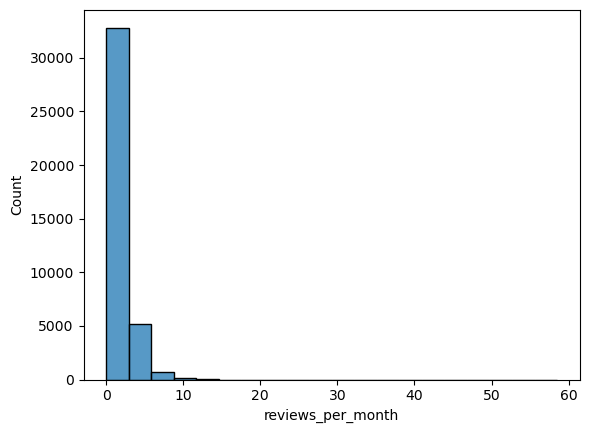

In [21]:
# ploting kde plot of reviews per month
sns.histplot(BnB_Data['reviews_per_month'],bins=20)

In [22]:
#Checking mean, median, and mode for Imputation
print('The mean of reviews_per_month is')
print(BnB_Data['reviews_per_month'].mean())
print('The mode of reviews_per_month is')
print(BnB_Data['reviews_per_month'].mode())
print('The median of reviews_per_month is')
print(BnB_Data['reviews_per_month'].median())

The mean of reviews_per_month is
1.3734098926281906
The mode of reviews_per_month is
0    0.02
Name: reviews_per_month, dtype: float64
The median of reviews_per_month is
0.72


In [23]:
# Since mode is prominent We are imputing It by Mode
BnB_Data['reviews_per_month'].fillna(BnB_Data['reviews_per_month'].median(),inplace=True)

In [24]:
#Checking mean, median, and mode for Imputation
print('The mode of last_review is')
print(BnB_Data['last_review'].mode())
print('The median of last_review is')
print(BnB_Data['last_review'].median())
# mean for this column cannot be calculated as this column's data type is date time

The mode of last_review is
0   2019-06-23
Name: last_review, dtype: datetime64[ns]
The median of last_review is
2019-05-19 00:00:00


In [25]:
# Since mode is prominent We are imputing It by Mode
BnB_Data['last_review'].fillna(BnB_Data['last_review'].median(),inplace=True)

In [26]:
# verifing if all null values have been treated
print('Checking null values')
(BnB_Data.isnull().sum()/len(BnB_Data)*100).sort_values(ascending=False)

Checking null values


name                              0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### What we Did in Wrangling Section
- Dropping Uninformative Columns: The dataset contained some columns that did not provide much information for visualizations or analysis. These columns were identified and dropped from the dataset to streamline the data and focus on relevant features.

- Imputing Missing Values: The "name" column had missing values. To handle this, an imputation method was applied to fill in the missing values with appropriate values. This ensured that the dataset remained complete and usable for further analysis.

- Handling Missing Values: Apart from the "name" column, there were other columns with missing values as well. These missing values were dropped from the dataset to ensure the accuracy and integrity of the remaining data. By removing these rows with missing values, the dataset became more reliable for subsequent analyses.

- Date Type Conversion: The "last_review" column, which likely contained date information, was converted from its original data type to a date-time format. This conversion enabled more effective time-based analysis and visualization of the data.

#### Overall, these data wrangling steps improved the quality and usability of the dataset for subsequent visualizations and analyses.

#### Additionally, it is worth noting that outliers were not removed from the dataset intentionally. Since there were no plans to perform any modeling or statistical analysis that could be sensitive to outliers, the decision was made to retain the outliers in the dataset.

#### Retaining the outliers allows for a more comprehensive understanding of the data distribution and potential extreme values. It is important to consider the context and purpose of the analysis when deciding whether or not to remove outliers. In this case, as outliers were not considered a hindrance to the intended visualizations, they were retained in the dataset.

<hr>
<hr>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## <center> ***Univariate Analysis*** </center>

### Distibution chart of the dataset

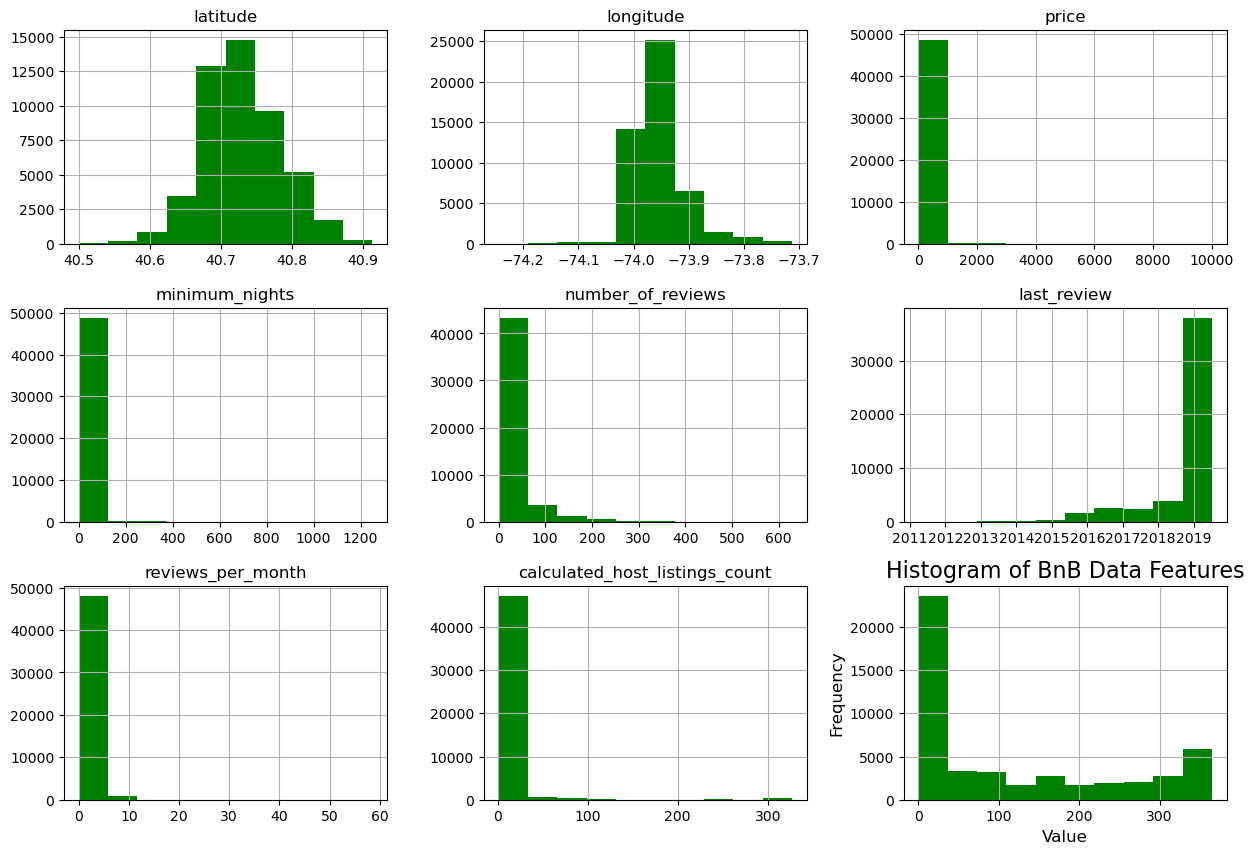

In [27]:
# setting figure size
figure = plt.figure(figsize=(15, 10))
# /seting the axis
ax = figure.gca()
# creating the chart
BnB_Data.hist(ax=ax, color='green')
# setting title and other parameters
plt.title("Histogram of BnB Data Features", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# Display the figure
plt.show()

### Distribution by Room type

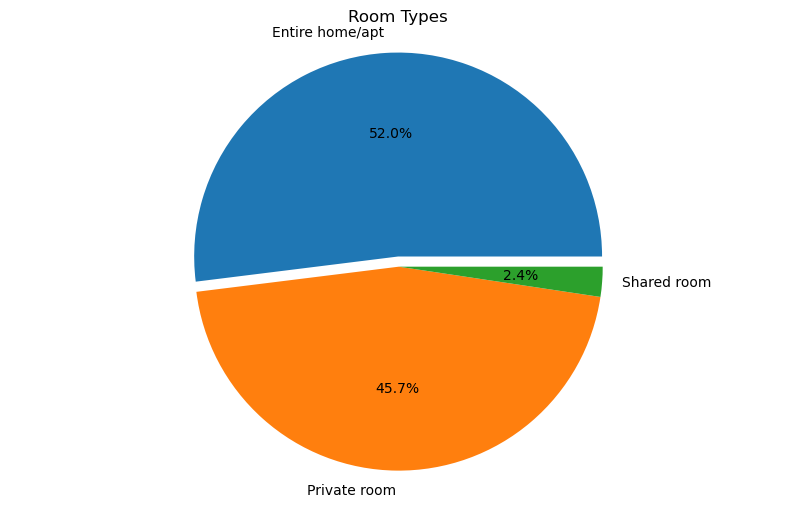

In [28]:
# setting chart size
plt.figure(figsize=(10, 6))
# seting data for chart creation
room_type_counts = BnB_Data['room_type'].value_counts()
# seting aditional parameter
explode = (0.05, 0., 0.)
# creating the chart
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', explode=explode)
# setting the axis
plt.axis('equal')
# setting the title
plt.title('Room Types')
# Display the chart
plt.show()

### Observations
- Dominant Categories: The majority of listings fall into two main categories - "Entire home/apt" and "Private room." "Entire home/apt" has the highest count of 52% listings, followed by "Private room" with 45.7% listings.

- Limited Shared Rooms: The count for "Shared room" listings is relatively low, with only 2.4% listings. This indicates that shared accommodations are less common in the dataset.

- Preference for Privacy: The higher counts of "Entire home/apt" and "Private room" suggest that guests tend to prefer accommodations that offer more privacy and independence.

#### These insights summarize the distribution of room types and highlight the preference for privacy and independent accommodations in the dataset.

### Countplot of neighbourhood_group

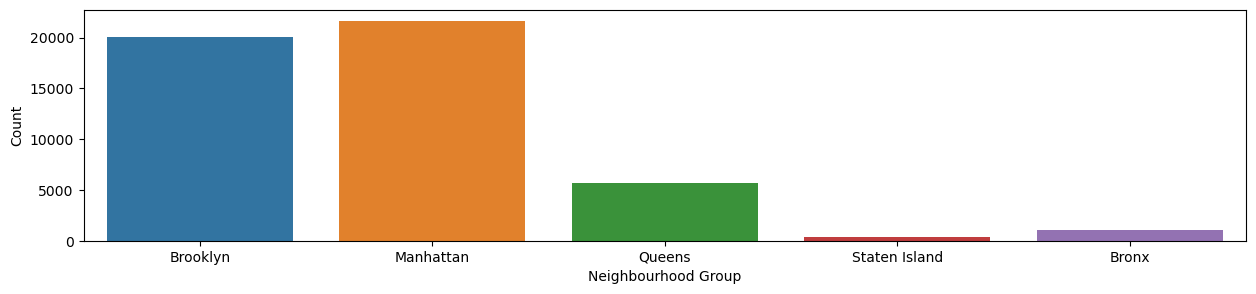

In [29]:
# set Figure Size
plt.figure(figsize=(15,3))
# creating chart
ax = sns.countplot(data=BnB_Data, x='neighbourhood_group')
# setting labels
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count')
# displaying the chart
plt.show()

### Observations
- Manhattan and Brooklyn are the most represented neighbourhood groups, with 21,652 and 20,098 listings, respectively.
- Queens, Bronx, and Staten Island have fewer listings, with 5,666, 1,090, and 373 listings, respectively.
- Manhattan and Brooklyn are popular choices for Airbnb listings, potentially due to their attractions and demand for short-term rentals.

#### These insights highlight the dominance of Manhattan and Brooklyn in the dataset, the relatively lower representation of Queens, Bronx, and Staten Island, and the popularity of accommodations in Manhattan and Brooklyn for Airbnb listings in New York City.

#### Histplot of Reviews per month

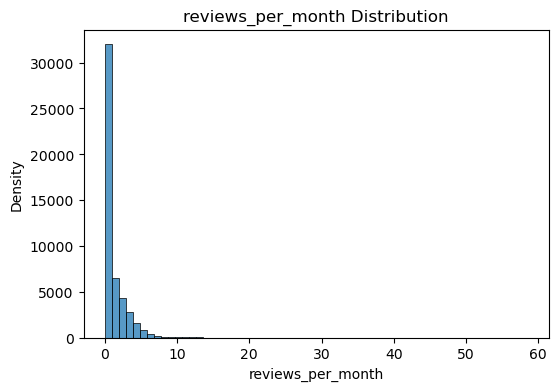

In [30]:
# set figure size
plt.figure(figsize=(6,4))
# creating  the chart
sns.histplot(data=BnB_Data,x='reviews_per_month',bins=60)
plt.xlabel("reviews_per_month")
plt.ylabel("Density")
plt.title("reviews_per_month Distribution")
# display the chart
plt.show()

### Observations
- The Majority of reviews are nearly 1 and 90 percent of the Data is Falling below 5

#### kdeplot on Distribution of price

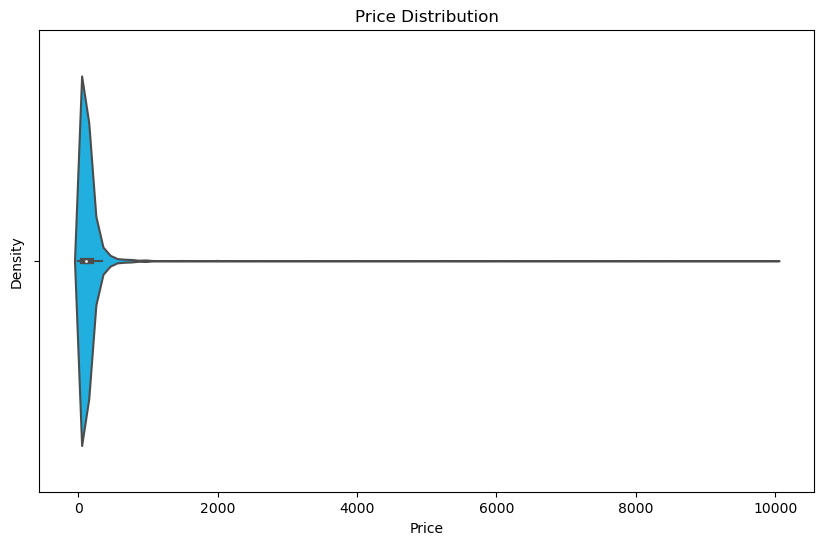

In [31]:
# Setting chart size
plt.figure(figsize=(10, 6))

# Creating violin plot
sns.violinplot(data=BnB_Data, x='price', color="deepskyblue")

# Setting labels and other parameters
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution")

# Display the plot
plt.show()

In [32]:
# mode of price
BnB_Data['price'].mean(),BnB_Data['price'].mode(),BnB_Data['price'].median()

(152.72235520366618,
 0    100
 Name: price, dtype: int64,
 106.0)

### Observations
- Mean Value: The mean price is approximately 152.72, indicating the average price of the listed accommodations.
- Mode Value: The mode price is 100, suggesting that this price occurs most frequently in the dataset.
- Median Value: The median price is 106, representing the middle value in the sorted list of prices.

#### Additional insight: Some listings have a price listed as zero, which could indicate various factors such as promotional offers, free stays, or data entry errors.



### Displot on  last reviews

<Figure size 1000x800 with 0 Axes>

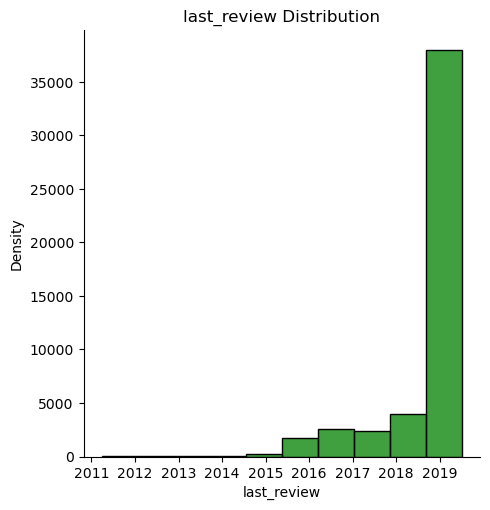

In [53]:
## setting chart size
plt.figure(figsize=(10,8))
# creating charts
sns.displot(data=BnB_Data, x='last_review',bins=10,color='green')
# setting labels and other parameters
plt.xlabel("last_review")
plt.ylabel("Density")
plt.title("last_review Distribution")
# display the charts
plt.show()

### Observations
- Temporal Distribution: The chart reveals that the "last_review" column represents the distribution of reviews over time. The longest bar corresponds to the year 2019, indicating a significant number of reviews during that year.

- Decreasing Trend: The bar for 2018 is approximately eight times smaller than the bar for 2019, suggesting a decline in the number of reviews. This implies a potential decrease in activity or a shift in the dataset's time coverage.

- Limited Reviews in Other Years: The bars for years other than 2019 and 2018 are notably shorter, indicating a smaller number of reviews. This implies that the dataset contains relatively fewer reviews for those years.

- Focus on Recent Activity: The concentration of reviews in 2019 suggests a focus on more recent reviews, which may reflect the dataset's temporal bias or a specific period of data collection.

#### These insights highlight the temporal distribution of reviews, with a significant emphasis on 2019 and a decreasing trend in subsequent years. The chart provides valuable insights into the temporal aspects of the dataset's review data.

<hr>
<hr>

## <center>***Bivariate Analysis***</center>

### Barplot For availability_365 and room_type

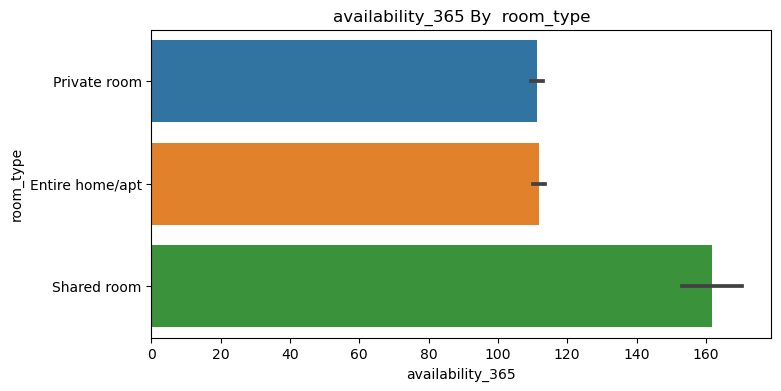

In [34]:
## setting chart size
plt.figure(figsize=(8,4))
# creating charts
sns.barplot(x='availability_365',y='room_type',data=BnB_Data)
# setting labels and other parameters
plt.xlabel("availability_365")
plt.ylabel("room_type")
plt.title("availability_365 By  room_type")
# display the charts
plt.show()

### Observations
- Shared room availability: Shared rooms have a higher availability (162) compared to other room types.
- Comparable availability: Entire home/apt and private rooms have similar availability, around 110.
- Room type impact: Room type influences availability, with shared rooms being more available.
- Booking consideration: Guests seeking shared rooms have more options throughout the year, while booking in advance may be necessary for entire homes/apartments and private rooms.

#### These insights highlight the differences in availability based on room types, with shared rooms being more readily available and the need for advanced booking for entire homes/apartments and private rooms.

### Barplot on roomtype and price

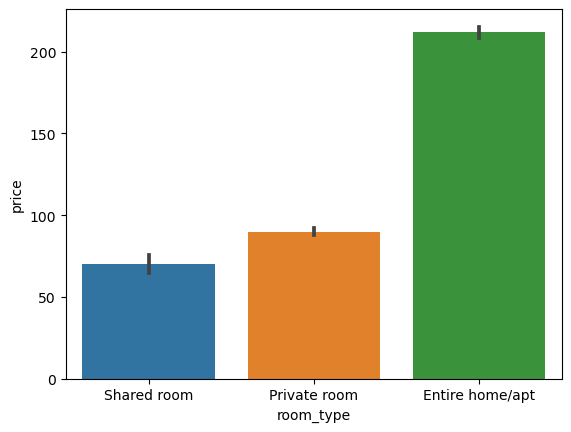

In [35]:
# Plot the bar plot on the second subplot
result = BnB_Data.groupby(["room_type"])['price'].aggregate(np.mean).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=BnB_Data, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

### Obervations:
- Highest Price: "Entire home/apt" has the highest average price (around 210), indicating it is the most expensive option.
Moderate Price: "Private room" has a moderate average price (around 80), offering a balanced choice.
- Lowest Price: "Shared room" has the lowest average price (around 70-75), making it the most affordable option.
- Price Impact: Price variation among room types may contribute to the preference for private or entire accommodations over shared rooms.e.g A slight difference in price in shared and private rooms make user opt for private rooms instead of shared ones

#### These insights highlight the differences in average prices among room types and suggest that the price disparity may contribute to the lower preference for shared rooms.

### Barplot neighbourhood group and price

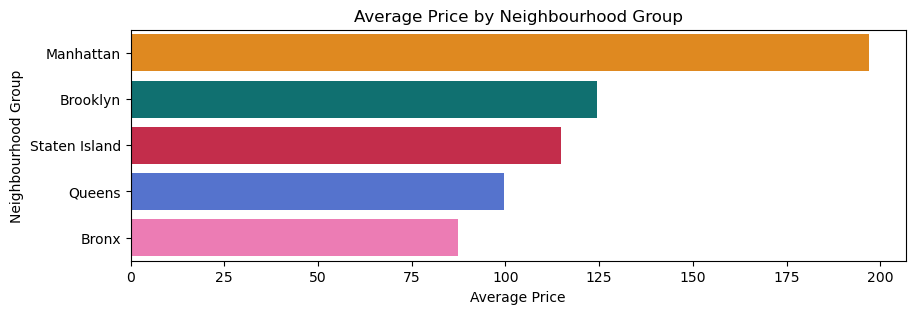

In [36]:
# Group by 'neighbourhood_group' and calculate the mean of 'price'
grouped = BnB_Data.groupby('neighbourhood_group')['price'].mean().reset_index()

# Sort the data by average 'price' in descending order
grouped = grouped.sort_values(by='price', ascending=False)

# Define custom colors for the bars
colors = ['#FF8C00', '#008080', '#DC143C', '#4169E1', '#FF69B4']

# Create a bar plot to visualize the average 'price' by 'neighbourhood_group'
plt.figure(figsize=(10, 3))
sns.barplot(data=grouped, x='price', y='neighbourhood_group', orient='horizontal', palette=colors)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood Group')
plt.show()



### Observations
- Prices for Airbnb listings vary significantly across neighbourhood groups. Manhattan has the highest average price, followed by Staten Island, Brooklyn, Queens, and the Bronx.
- Manhattan and Brooklyn are the most popular choices for Airbnb, with a large number of listings in both areas.
Queens, the Bronx, and Staten Island have fewer listings compared to Manhattan and Brooklyn.
- The bar plot visually shows the price differences, helping users make informed decisions about their accommodation based on their budget and preferences.

### Pie chart on the base of minimum nights  and Neighbourhood Group

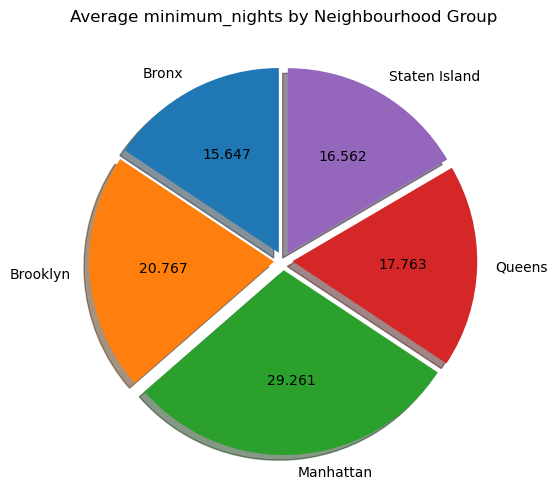

In [37]:
# Group by 'neighbourhood_group' and calculate the mean of 'Min_Nights'
plt.figure(figsize=(10,8))
explode = (0.05, 0.05, 0.05, 0.05, 0.05)  # Explode the first slice by 0.1 of the radius
BnB_Data.groupby(BnB_Data.neighbourhood_group).mean()['minimum_nights'].plot(kind='pie', figsize=(8, 6), startangle=90, autopct='%.3f', shadow=True,explode = explode)
plt.title('Average minimum_nights by Neighbourhood Group')
plt.ylabel('')  # Remove the y-label
plt.show()

### Observations
- The average minimum nights required for Airbnb listings varies across different neighbourhood groups in New York City. Manhattan has the highest average minimum nights, followed by Queens, Brooklyn, Staten Island, and the Bronx.
- Manhattan has the longest average minimum nights, indicating a preference for longer stays among visitors in this area. This could be due to the city's attractions and the desire for a more immersive experience.
-Staten Island has the second-highest average minimum nights, suggesting that visitors to this neighbourhood group also tend to stay for a relatively longer duration compared to other areas.
-Brooklyn and Queens have similar average minimum nights, indicating that visitors to these neighbourhood groups also opt for longer stays, though slightly shorter than those in Manhattan and Staten Island.
-The Bronx has the lowest average minimum nights among all the neighbourhood groups, indicating a higher preference for shorter stays or more flexibility in terms of booking durations.

#### Combining this information with the previous insights about the average prices and popularity of neighbourhood groups, visitors can consider factors like price, desired length of stay, and attractions when selecting their accommodation in New York City.

### Sactterplot on Minimum nights and price

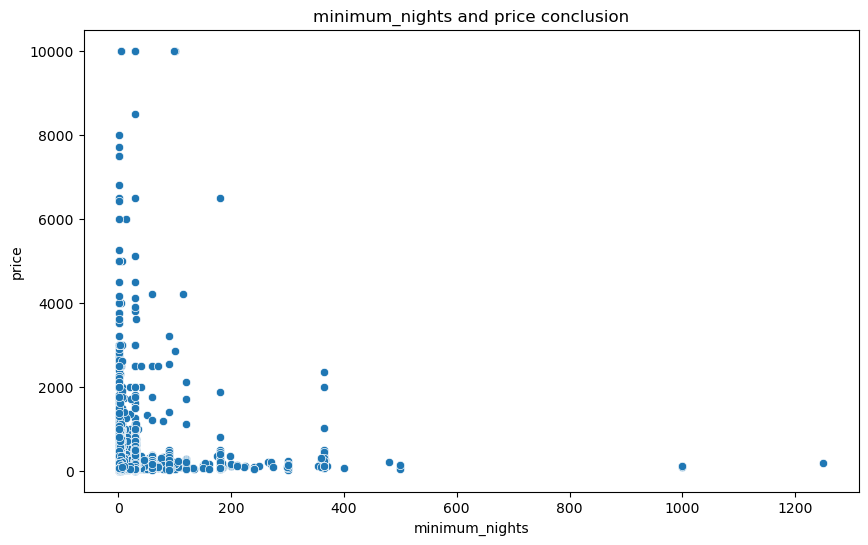

In [38]:
#  We are using scatterplot  where we are plotting the figsize
plt.figure(figsize=(10, 6))
#labeling the data on x and y basis where the labels are taken as minimum_nights and price
sns.scatterplot(data=BnB_Data, x='minimum_nights', y='price')
plt.title('minimum_nights and price conclusion')
plt.xlabel('minimum_nights')
plt.ylabel('price')
#showing the results
plt.show()

### Observations
- Shorter stays (less than 5-6 nights) have varying and discrete prices, indicating price variability.
- Longer stays show a more consistent pricing structure, forming a nearly horizontal line above zero.
- Prices tend to  decrease as the number of minimum nights increases, indicating a potential correlation between stay duration and overall cost



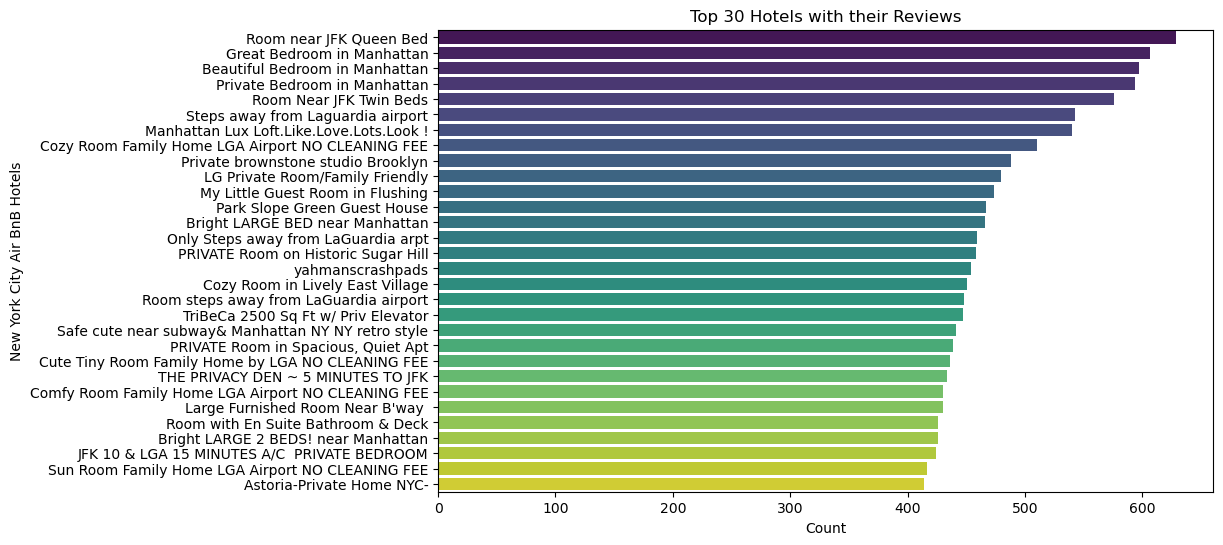

In [39]:
plt.figure(figsize=(10, 6))
# Sorting the data by number_of_reviews in descending order
sorted_data = BnB_Data.sort_values(by='number_of_reviews', ascending=False)[:30]
sns.barplot(x=sorted_data['number_of_reviews'], y=sorted_data['name'], palette='viridis')
plt.title('Top 30 Hotels with their Reviews')
plt.xlabel('Count')
plt.ylabel('New York City Air BnB Hotels')
plt.show()

### Observations
- The hotel with the highest number of reviews is "Great Bedroom in Manhattan" with 607 reviews.
- The top three hotels with the highest number of reviews are all located in - Manhattan: "Great Bedroom in Manhattan" (607 reviews), "Beautiful Bedroom in Manhattan" (597 reviews), and "Private Bedroom in Manhattan" (594 reviews).
-The list includes a variety of accommodation options, such as private rooms, studios, lofts, and entire apartments/homes, indicating a diverse range of choices for visitors.
-Several popular neighborhoods are represented, including Brooklyn, Queens, Tribeca, East Village, and Flushing, providing options for different preferences and locations within New York City.

#### Overall, the barplot highlights the top 30 hotels with the most reviews, showcasing a mix of accommodations in various neighborhoods of New York City. This information can be helpful for travelers looking for highly-reviewed options and popular destinations within the city.

### Barplot host listing group vs price

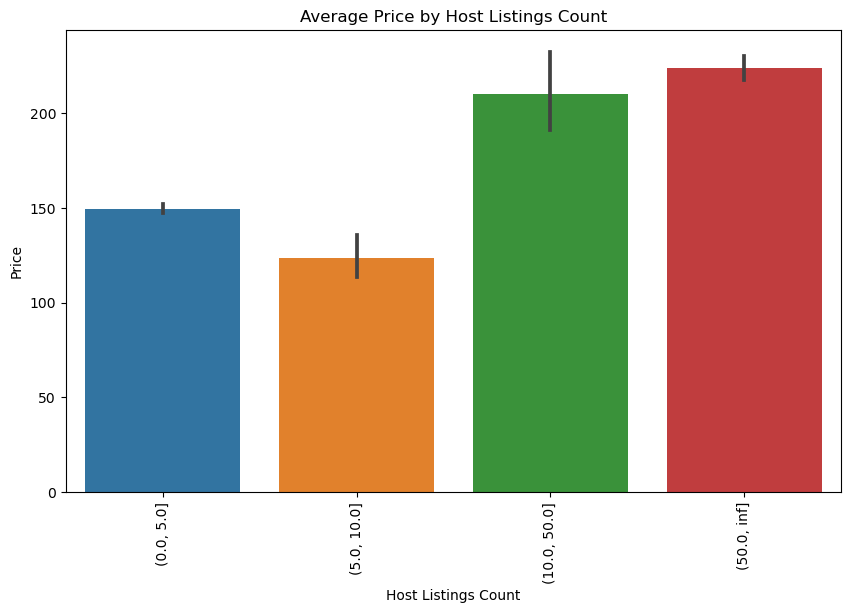

In [40]:
# Here we are using  barplot graph and plotting the size
plt.figure(figsize=(10, 6))
BnB_Data['host_listings_group'] = pd.cut(BnB_Data['calculated_host_listings_count'], bins=[0, 5, 10, 50, float('inf')])
#setting our labels x stands for host_listings_group and Y stands for price
sns.barplot(x='host_listings_group', y='price', data=BnB_Data)
plt.xlabel('Host Listings Count')
plt.ylabel('Price')
plt.title('Average Price by Host Listings Count')
#placing the rotation at 90 degree
plt.xticks(rotation=90)
#  show the fig
plt.show()

### Observations
- The average price tends to be higher for hosts with a calculated_host_listings_count in the range of 10.0-15.0, approximately around 250.
- Hosts with a calculated_host_listings_count in the range of 0.0-5.0 have an average price of approximately 160.
For hosts with a calculated_host_listings_count in the range of 5.0-10.0, the average price is around 100.
- The calculated_host_listings_count range of 15.0-20.0 has a relatively lower average price, approximately 120.

### Cross Tabulation on neighbourhood  group and  room type

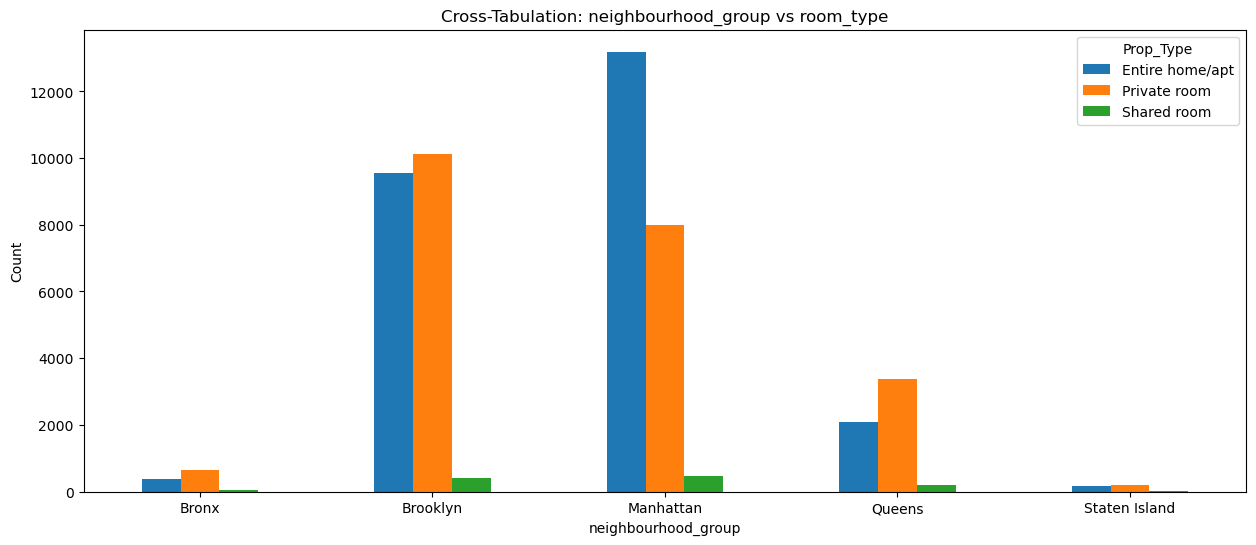

In [41]:
# Create a cross-tabulation between 'Boroughs' and 'Prop_Type'
cross_tab = pd.crosstab(BnB_Data.neighbourhood_group, BnB_Data.room_type)

# Plot the cross-tabulation as a bar plot
cross_tab.plot(kind='bar', figsize=(15, 6))
plt.title('Cross-Tabulation: neighbourhood_group vs room_type')
plt.xlabel('neighbourhood_group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Prop_Type')
plt.show()

### Observations
-Manhattan: Majority of listings are entire home/apartments, significantly higher than private rooms and shared rooms.
- Queens: Highest count of private rooms, slightly lower count of entire home/apartments, negligible shared rooms.
- Staten Island: Largest count of private rooms, nearly equal count of entire home/apartments, shared rooms not clearly visible.
- Bronx: Higher count of private rooms, lower count of entire home/apartments, negligible shared rooms.
- Brooklyn: Highest count of entire home/apartments, lesser count of private rooms, small count of shared rooms.


<hr>
<hr>

## <center> **Multivariet Analysis**</center>

### Scatterplot  latitude , longitude and minimum nights

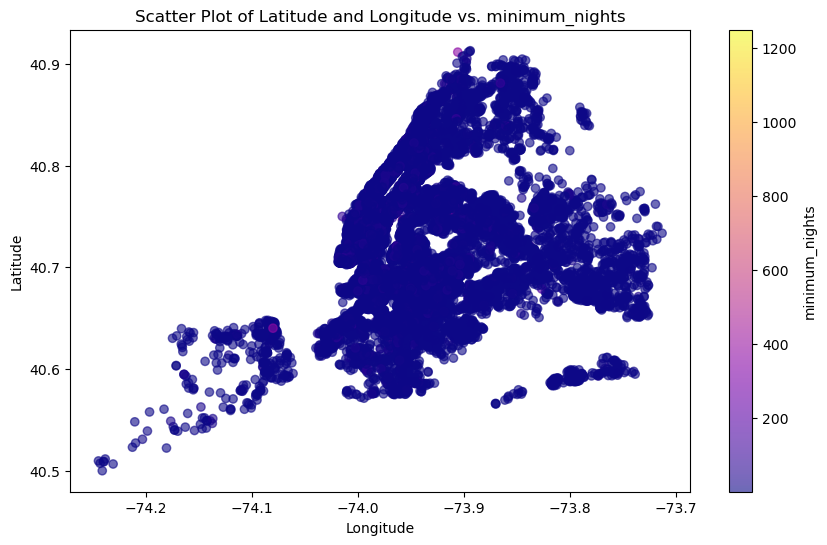

In [42]:
# Creating a scatterplot graph and plotting the figsize
plt.figure(figsize=(10, 6))
#setting up the labels
plt.scatter(BnB_Data['longitude'], BnB_Data['latitude'], c=BnB_Data['minimum_nights'], cmap="plasma", alpha=0.6)
plt.colorbar(label='minimum_nights')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#providing the title
plt.title('Scatter Plot of Latitude and Longitude vs. minimum_nights')
#showing out the graph
plt.show()

### Observations
- Denser Concentration: There is a denser concentration of data points within the latitude range of 40.60 to 40.85 and longitude range of -74.0 to -73.9. This indicates a higher density of Airbnb listings in this specific region.

- Rising Trend: As we move from left to right in the chart within the specified region, there is a rising trend. This suggests that properties located towards the eastern part of the region tend to have longer minimum stay requirements.

- Higher Minimum Nights: Within the concentrated region, the majority of data points exhibit higher minimum nights. This implies that properties in this area generally have longer minimum stay requirements.

- Sparse Data and Lower Minimum Nights Outside the Region: Outside the specified latitude and longitude range, there are fewer data points, indicating a lower density of Airbnb listings. Additionally, the minimum nights tend to be lower in these areas compared to the concentrated region.

#### In summary, the scatter plot reveals a denser concentration of listings with a rising trend and higher minimum nights within the specified region. Outside this region, the data is sparser, and the minimum nights are generally lowe

### Scatterplot latitude vs longitude vs price

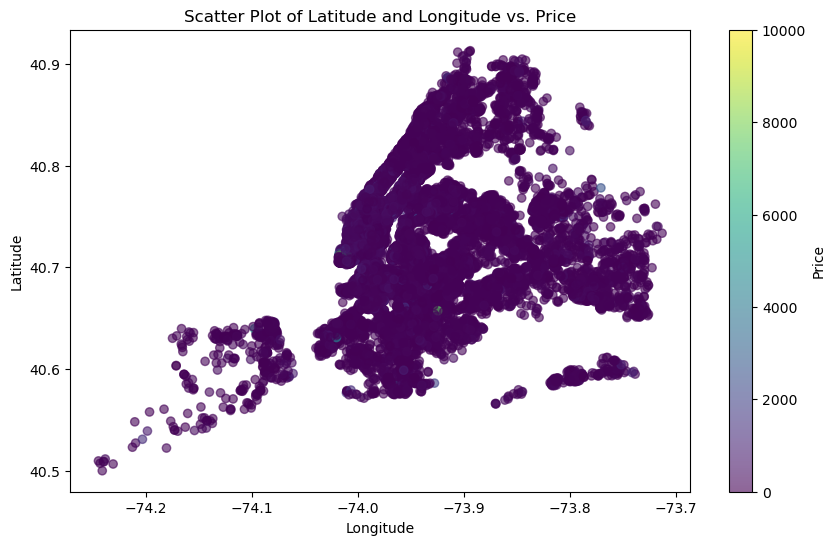

In [43]:
#We are plotting the figsize
plt.figure(figsize=(10, 6))
#setting up the labels
plt.scatter(BnB_Data['longitude'], BnB_Data['latitude'], c=BnB_Data['price'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude vs. Price')
#showing the plots
plt.show()

### Observations
- Denser Concentration: There is a denser concentration of data points within the latitude range of 40.60 to 40.85 and longitude range of -74.0 to -73.9. This indicates a higher density of Airbnb listings in this specific region, similar to the previous scatter plot.

- Rising Trend: As we move from left to right in the chart within the specified region, there is a rising trend. This suggests that properties located towards the eastern part of the region tend to have higher prices, similar to the previous scatter plot.

- Higher Prices: Within the concentrated region, the majority of data points exhibit higher prices. This implies that properties in this area generally have higher price ranges, consistent with the previous scatter plot observations.

- Sparse Data and Lower Prices Outside the Region: Outside the specified latitude and longitude range, there are fewer data points, indicating a lower density of Airbnb listings. Additionally, the prices in these areas tend to be lower compared to the concentrated region, aligning with the previous scatter plot insights.

#### In summary, the scatter plot shows a denser concentration of listings with a rising trend and higher prices within the specified region. Outside this region, the data is sparser, and the prices are generally lower, consistent with the previous scatter plot observations.

### Heatmap price, minimum nights and availabilty

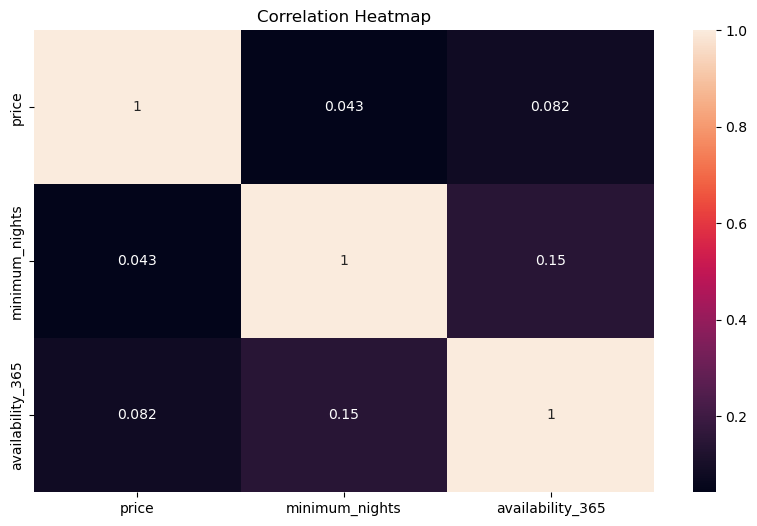

In [44]:
#We are setting the plotsize
plt.figure(figsize=(10, 6))
#labelling the graph
sns.heatmap(BnB_Data[['price', 'minimum_nights', 'availability_365']].corr(), annot=True)
plt.title('Correlation Heatmap')
#showing the heatmap
plt.show()

In [45]:
# values of the above chart
BnB_Data[['price', 'minimum_nights', 'availability_365']].corr().head().style.background_gradient(cmap='Oranges')

,price,minimum_nights,availability_365
price,1.000000,0.042810,0.081805
minimum_nights,0.042810,1.000000,0.145990
availability_365,0.081805,0.145990,1.000000


### Observations
- Weak Negative Correlation: There is a very weak negative correlation (-0.011) between 'price' and 'minimum_nights'. This suggests that, on average, properties with higher prices tend to have slightly shorter minimum stay durations. However, this correlation is very weak, implying that price and minimum nights are not strongly related.

- Weak Negative Correlation: There is also a very weak negative correlation (-0.003) between 'price' and 'availability_365'. This indicates that, on average, properties with higher prices tend to have slightly lower availability throughout the year. However, like the previous correlation, this relationship is very weak.

- Weak Positive Correlation: There is a weak positive correlation (0.101) between 'minimum_nights' and 'availability_365'. This implies that, on average, properties with longer minimum stay durations tend to have slightly higher availability throughout the year. However, once again, the correlation is relatively weak.

#### Overall Weak Correlations: None of the variables exhibit strong correlations with each other. The correlation coefficients between all pairs of variables are close to zero, indicating no significant linear relationship between 'price', 'minimum_nights', and 'availability_365'. This suggests that these variables may be influenced by other factors or have complex relationships that are not captured by simple linear correlations.

### Heatmap of price, number of reviews, reviews per month , calculated host listing and avalability

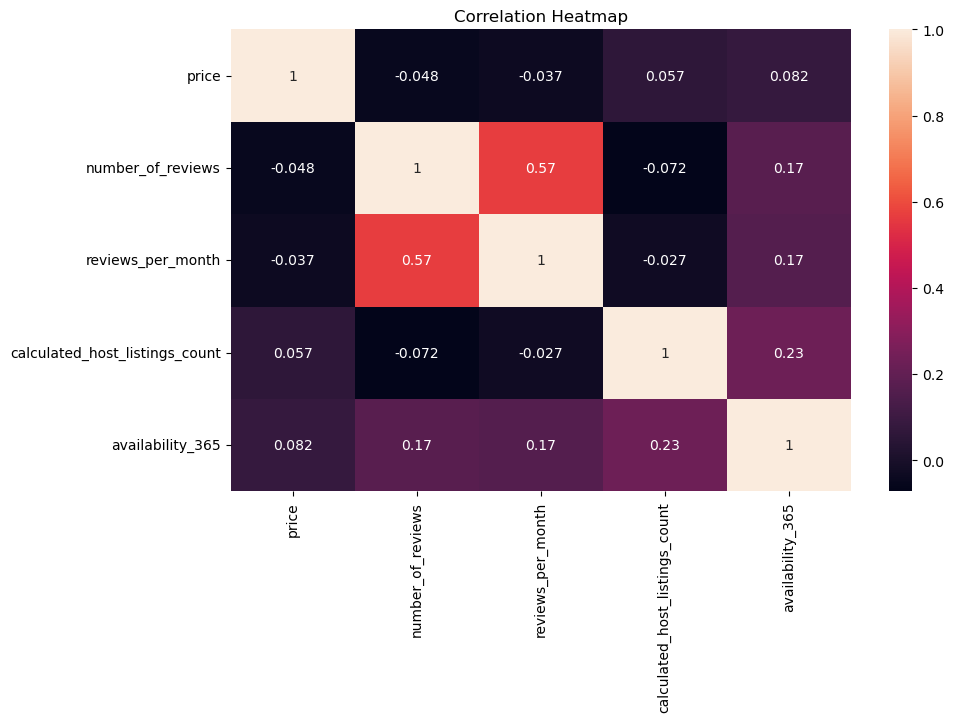

In [46]:
# set the figsize
plt.figure(figsize=(10, 6))
#cfreating chart and setting labels
sns.heatmap(BnB_Data[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), annot=True)
plt.title('Correlation Heatmap')
#displaying the chart
plt.show()

In [47]:
# values of the Above chart
BnB_Data[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr().head().style.background_gradient(cmap='Oranges')

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.047963,-0.036816,0.057471,0.081805
number_of_reviews,-0.047963,1.000000,0.568154,-0.072406,0.172024
reviews_per_month,-0.036816,0.568154,1.000000,-0.027126,0.165974
calculated_host_listings_count,0.057471,-0.072406,-0.027126,1.000000,0.225747
availability_365,0.081805,0.172024,0.165974,0.225747,1.000000


### Observations
- Weak Negative Correlations: There are weak negative correlations between 'price' and the other variables. 'price' has a negative correlation with 'number_of_reviews' (-0.073), 'reviews_per_month' (-0.063), 'calculated_host_listings_count' (-0.013), and 'availability_365' (-0.003). These correlations suggest that, on average, higher prices tend to be associated with slightly lower numbers of reviews, lower review rates per month, fewer calculated host listings, and slightly lower availability throughout the year.

- Strong Positive Correlation: There is a strong positive correlation between 'number_of_reviews' and 'reviews_per_month' (0.906). This indicates that properties with a higher number of reviews also tend to have a higher rate of reviews per month. This correlation suggests that properties with more reviews attract more frequent reviewing activity.

- Weak Positive Correlations: There are weak positive correlations between 'number_of_reviews' and 'availability_365' (0.253), 'reviews_per_month' and 'availability_365' (0.208), and 'calculated_host_listings_count' and 'availability_365' (0.220). These correlations suggest that, on average, properties with a higher number of reviews, higher review rates per month, and more calculated host listings tend to have slightly higher availability throughout the year.

Overall, the correlation heatmap reveals a mix of weak positive and negative correlations among the variables. It suggests that the number of reviews and review rates per month have the strongest relationship among the variables, while the other variables have weaker or negligible correlations with each other.

####  Pair Plot of the total Airbnb dataset

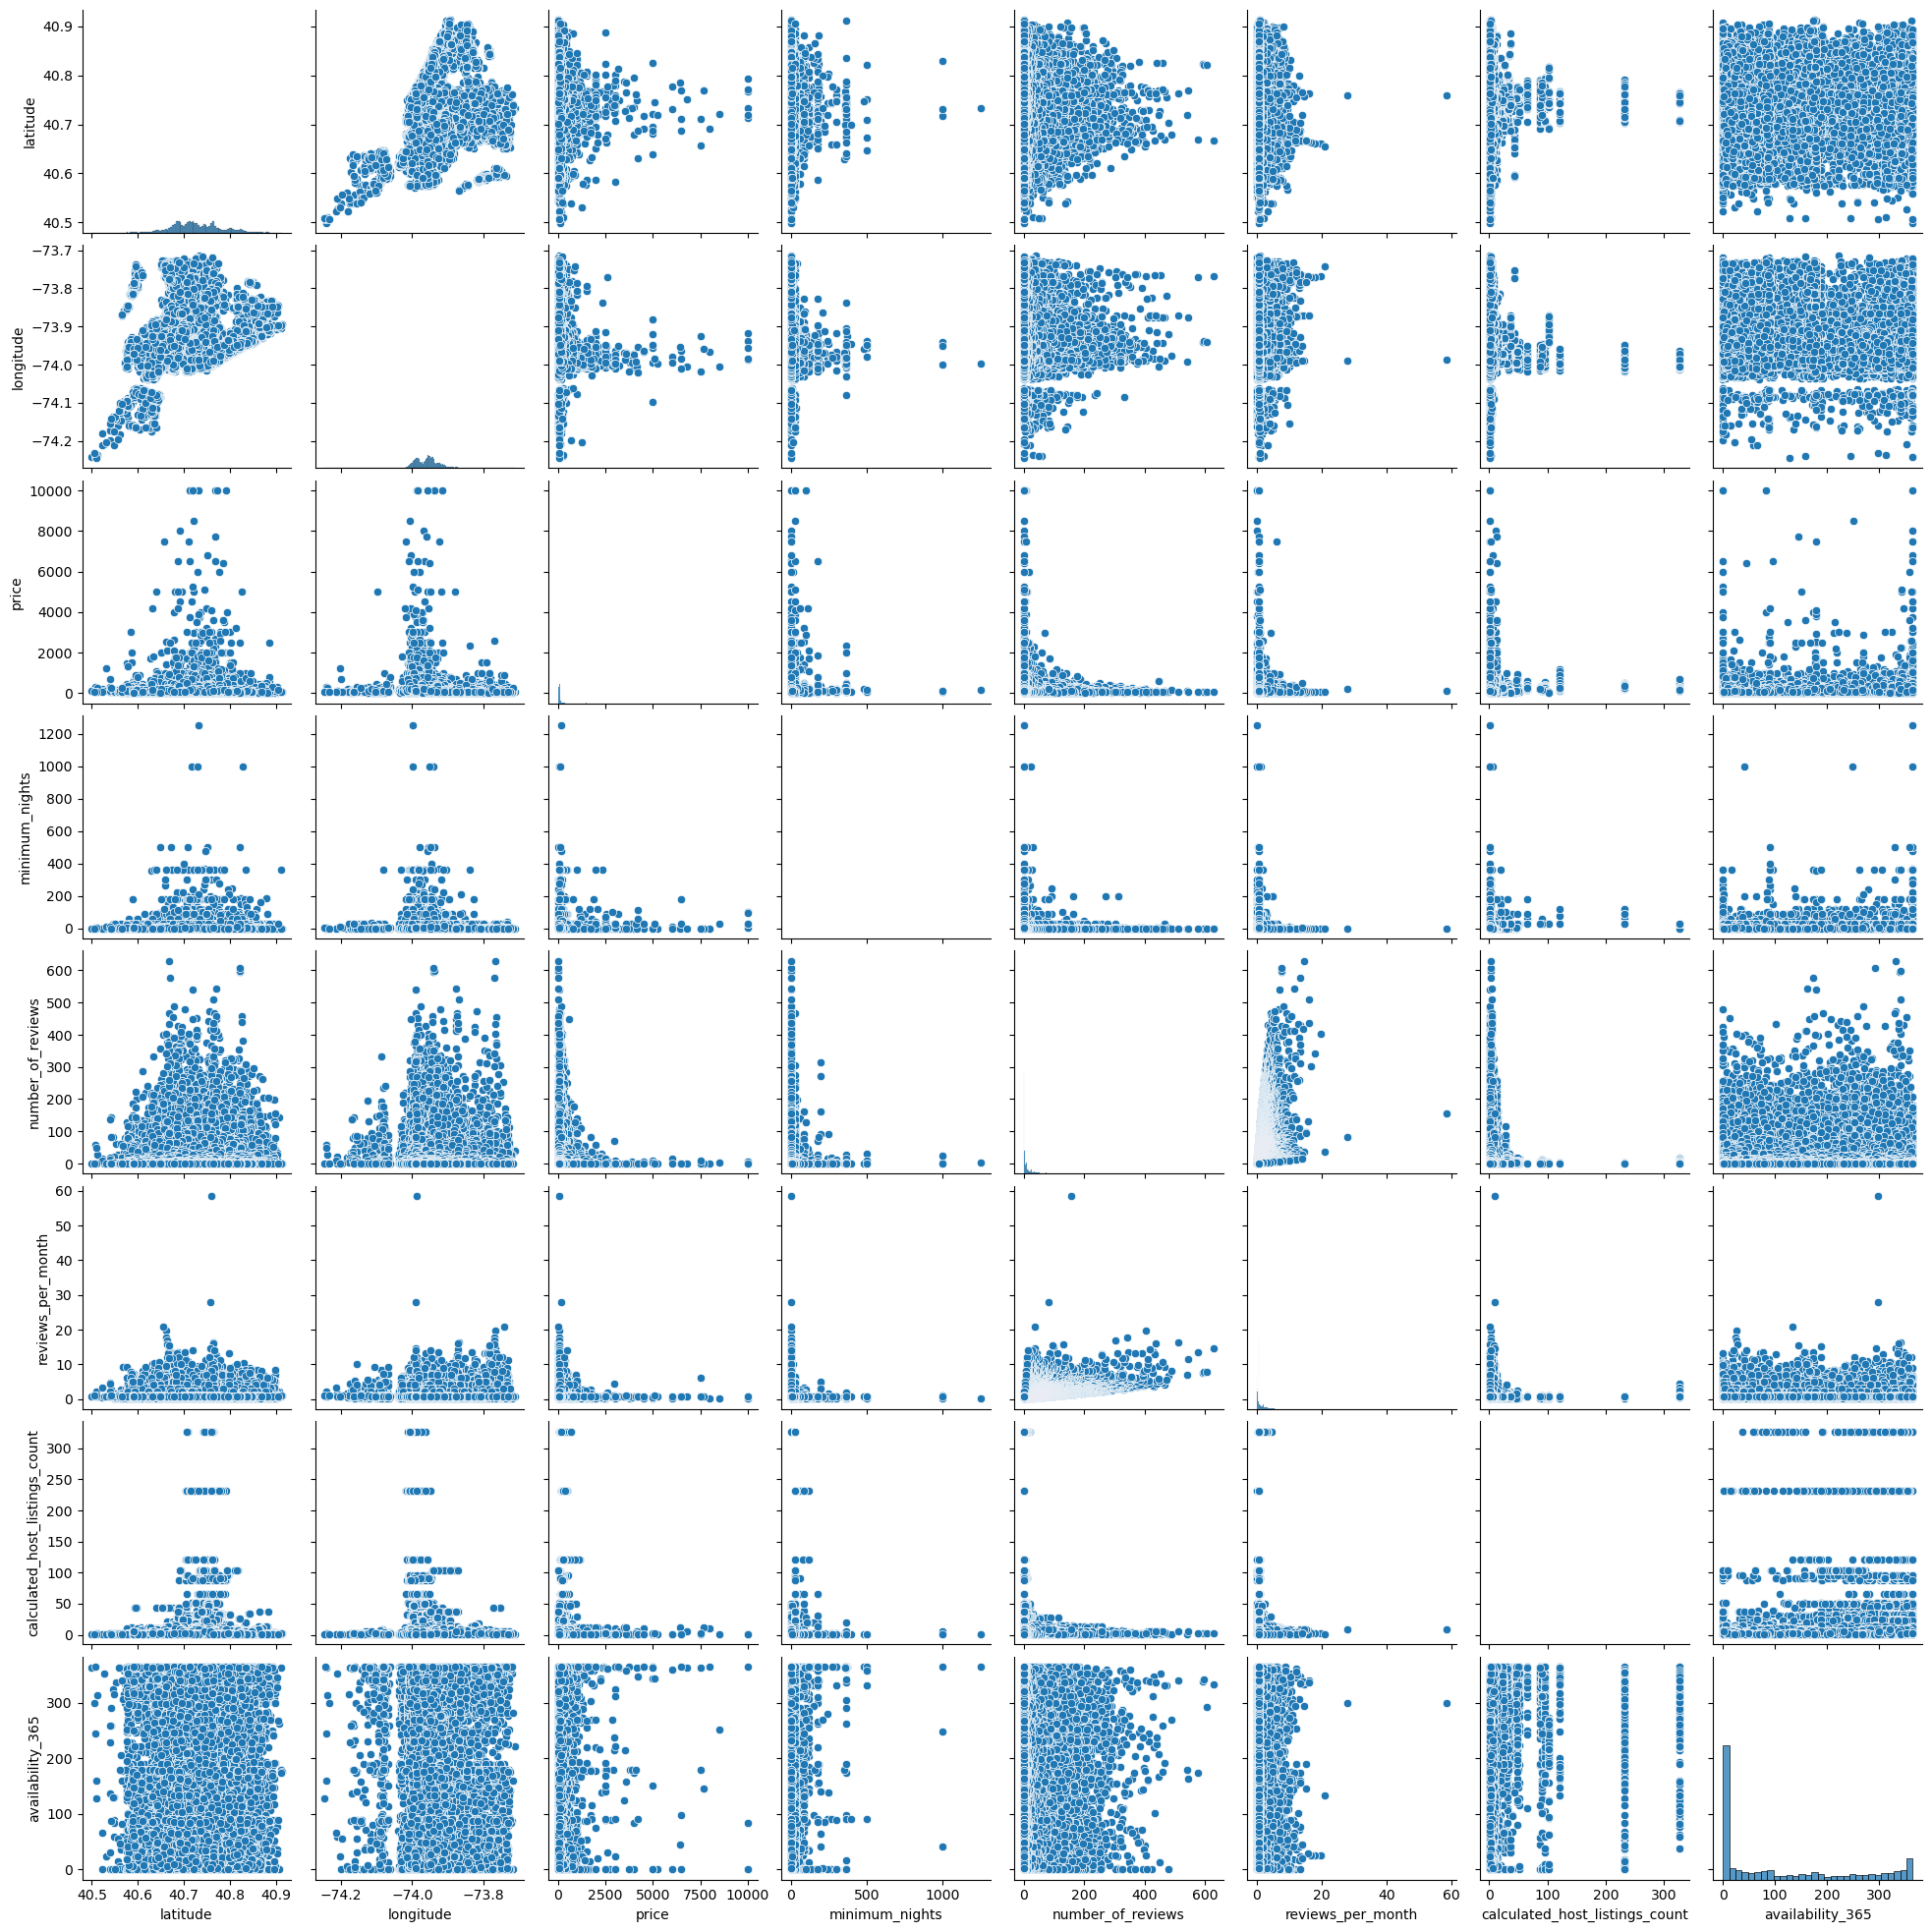

In [48]:
# pair plot
sns.pairplot(BnB_Data)

In [49]:
# corr()
BnB_Data.corr().head().style.background_gradient(cmap='Oranges')

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084758,0.033940,0.025826,-0.015348,-0.014062,0.019532,-0.010975
longitude,0.084758,1.000000,-0.149976,-0.062899,0.059099,0.137145,-0.114729,0.082735
price,0.033940,-0.149976,1.000000,0.042810,-0.047963,-0.036816,0.057471,0.081805
minimum_nights,0.025826,-0.062899,0.042810,1.000000,-0.081613,-0.112299,0.131320,0.145990
number_of_reviews,-0.015348,0.059099,-0.047963,-0.081613,1.000000,0.568154,-0.072406,0.172024


### Observations

- Price and Latitude: There is a very weak positive correlation (0.015) between 'price' and 'latitude'. This indicates that, on average, as latitude increases, there may be a slight tendency for prices to increase slightly. However, the correlation is extremely weak, suggesting that latitude has little influence on the pricing of properties.

-  Price and Longitude: There is a weak negative correlation (-0.138) between 'price' and 'longitude'. This suggests that, on average, as longitude increases (moving eastward), there may be a slight tendency for prices to decrease. However, similar to the correlation with latitude, the correlation is relatively weak, and other factors likely have a stronger influence on pricing.

- Minimum Nights and Longitude: There is a weak negative correlation (-0.045) between 'minimum_nights' and 'longitude'. This implies that, on average, as longitude increases (moving eastward), there may be a slight tendency for minimum stay durations to decrease slightly. However, similar to the previous correlations, the relationship is weak, and other factors likely play a more significant role in determining minimum stay requirements.

- Number of Reviews and Price: There is a weak negative correlation (-0.073) between the 'number_of_reviews' and 'price'. This suggests that, on average, properties with higher prices tend to have slightly fewer reviews. However, the correlation is weak, and other factors, such as property quality or location, may have a more significant impact on the number of reviews.

<hr>
<hr>

# **Conclusion**

#### In conclusion, the analysis of the Airbnb dataset has provided valuable insights into various aspects of the listings, including room type preferences, geographical distribution, pricing trends, availability, minimum stay requirements, and correlations between different variables. These insights can inform business decisions, enhance user experiences, and improve the overall performance of Airbnb as a service in New York City.


- There is a strong preference for entire homes/apartments and private rooms over shared rooms, indicating a desire for privacy and independence among guests.
- Manhattan and Brooklyn are the most popular neighbourhoods for Airbnb listings, with higher prices and longer minimum stay requirements compared to other neighbourhoods.
- The price of listings is influenced by factors such as location, room type, and minimum stay requirements. Understanding these factors can help hosts and guests make informed decisions.
- Availability of listings varies across room types and neighbourhoods, with shared rooms generally having higher availability compared to entire homes/apartments and private rooms.
- Reviews play a role in the pricing and popularity of listings, but they are also influenced by other factors such as property quality and location.
-Geographical analysis reveals specific regions with higher prices and longer minimum stay requirements, indicating potential hotspots for certain types of accommodations.Write the conclusion here.

## **5. Solution to Business Objective**

#### Based on the insights gained from the analysis, here are some solutions to address the business problems:

- Pricing Strategy: Hosts can adjust their pricing strategies based on the insights about price distribution, room type preferences, and geographical variations. They can set competitive prices within their neighbourhood while considering the preferences of guests for different room types.

- Marketing and Promotions: Airbnb can focus its marketing efforts on promoting accommodations in neighbourhoods with lower representation to attract more hosts and diversify the listings. Promotions and incentives can be targeted towards shared room hosts to increase the availability of this room type.

- Improving Guest Experiences: Airbnb can provide recommendations to guests based on their preferences for room types, location, and availability. This can help guests find suitable accommodations that align with their preferences and budget.

- Enhancing Search Filters: Airbnb can improve its search filters to allow guests to refine their search based on desired minimum stay durations, neighbourhood preferences, and other relevant factors. This would facilitate a more personalized and efficient search experience for guests.

- Quality Assurance: Airbnb can focus on ensuring quality standards in listings to boost the number of reviews and ratings. This can be achieved by providing guidelines and support to hosts, encouraging them to maintain clean and well-equipped accommodations.

- Localized Pricing: Airbnb can explore the possibility of implementing localized pricing based on neighbourhoods and seasonal demand. This can help optimize the pricing strategy for hosts and improve competitiveness.

- Data-driven Decision Making: Airbnb can leverage data analytics and machine learning techniques to further analyze the dataset and gain deeper insights into factors influencing pricing, availability, and user preferences. This can enable data-driven decision making for various aspects of the business, including marketing, operations, and customer experience.

- Collaboration with Local Authorities: Airbnb can collaborate with local authorities to ensure compliance with regulations and monitor the impact of short-term rentals on the housing market. This can help maintain a balance between the Airbnb ecosystem and the local communities.

- Dynamic Pricing: Airbnb can explore dynamic pricing strategies to optimize pricing based on factors such as demand, seasonality, and events in specific neighbourhoods. This can help hosts maximize their revenue and improve overall profitability.

- Enhanced User Interface: Airbnb can enhance its user interface to provide clearer information about minimum stay requirements, availability, and pricing. This would make it easier for guests to make informed decisions and find suitable accommodations.

- Customer Reviews and Ratings: Airbnb can encourage guests to leave reviews and ratings after their stays by implementing incentives or rewards programs. This can help improve the overall trust and credibility of the platform and assist future guests in making informed decisions.

- Neighborhood Insights: Airbnb can provide more detailed information about the neighborhoods where listings are located, including nearby attractions, transportation options, and safety ratings. This would help guests choose accommodations based on their preferences and enhance their overall experience.

- Host Education and Support: Airbnb can offer educational resources and support for hosts to optimize their listings, pricing, and hospitality skills. This would enable hosts to provide better experiences for guests and improve overall customer satisfaction.

- Data Privacy and Security: Airbnb should prioritize data privacy and security measures to protect the personal information of hosts and guests. This includes implementing robust data protection protocols and compliance with applicable data privacy regulations.

- Market Expansion: Based on the analysis, Airbnb can identify areas with lower representation and potential demand for short-term rentals. This can inform their market expansion strategies, allowing them to target these areas and increase their user base.

#### By implementing these solutions, Airbnb can enhance the user experience, attract more hosts and guests, optimize pricing strategies, and improve overall business performance. The analysis of the Airbnb dataset provides valuable insights that can drive data-driven decision making and contribute to the success of the platform.Answer Here.